In [1]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import optimizers
from tensorflow.keras import layers, models
import random
from os.path import expanduser
import os
from os.path import exists, join, basename, splitext
import io
import json
#from google.colab import drive
import numpy as np
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from IPython.core.debugger import set_trace


Init Plugin
Init Graph Optimizer
Init Kernel


# Get path

In [8]:
drive.mount('/content/drive')
!ls /content/drive/MyDrive/test_classifier/
data_path = '/content/drive/MyDrive/test_classifier'

NameError: name 'drive' is not defined

# images conversion

In [4]:
def encode_data(X) : 
    for name in X:
        total_frames = [file for file in X if file.startswith(name)]
        upper_range = len(total_frames)
        step = int(upper_range/10)
        video_sequence = []
        for index in range(0,upper_range,step):
            img = f"{name}_black{index}.jpg"
            path = os.path.join(data_path, cl, img)
            image = Image.open(path)
            image = image.resize((64,48))
            video_sequence.append(np.array(image))
        imgs.append(video_sequence[0:10])
        labels.append(i)

SyntaxError: invalid character in identifier (896923865.py, line 8)

In [147]:
def split_data():
    classes = {'pushups':0, 'squats':1, 'cleanjerk':2, 'jumpingjack':3,'lunges':4,'pullups':5}
    imgs = []
    labels = []
    data_path='Desktop/black_frames'
    for (cl, i) in classes.items():
        home = expanduser('~')
        images_path = [elt for elt in os.listdir(os.path.join(home, data_path, cl)) if elt.find('.jpg')>0]
        #files_list = os.listdir(images_path)
        unique_video_names = get_unique_video_names(images_path)
        random.shuffle(unique_video_names)
        unique_video_names_train, unique_video_names_val, unique_video_names_test = unique_video_names[0:33], unique_video_names[33:41], unique_video_names[41:52]
        
        


In [148]:
split_data()

4422
['v_PushUps_g16_c01_black11.jpg', 'v_PushUps_g05_c02_black86.jpg', 'v_PushUps_g25_c01_black89.jpg', 'v_PushUps_g05_c02_black103.jpg', 'v_PushUps_g04_c04_black42.jpg', 'v_PushUps_g04_c04_black56.jpg', 'v_PushUps_g05_c02_black117.jpg', 'v_PushUps_g05_c02_black92.jpg', 'v_PushUps_g04_c03_black99.jpg', 'v_PushUps_g12_c02_black23.jpg', 'v_PushUps_g03_c04_black46.jpg', 'v_PushUps_g03_c04_black52.jpg', 'v_PushUps_g12_c02_black37.jpg', 'v_PushUps_g16_c01_black39.jpg', 'v_PushUps_g23_c04_black1.jpg', 'v_PushUps_g04_c04_black81.jpg', 'v_PushUps_g22_c01_black0.jpg', 'v_PushUps_g05_c02_black45.jpg', 'v_PushUps_g05_c02_black51.jpg', 'v_PushUps_g03_c03_black62.jpg', 'v_PushUps_g04_c04_black95.jpg', 'v_PushUps_g25_c01_black76.jpg', 'v_PushUps_g04_c03_black72.jpg', 'v_PushUps_g05_c02_black79.jpg', 'v_PushUps_g04_c03_black66.jpg', 'v_PushUps_g25_c01_black62.jpg', 'v_PushUps_g12_c01_black50.jpg', 'v_PushUps_g17_c03_black55.jpg', 'v_PushUps_g09_c04_black60.jpg', 'v_PushUps_g24_c04_black16.jpg', 'v_P

NameError: name 'get_unique_video_names' is not defined

In [ ]:
for name in unique_video_names:
            total_frames = [file for file in files_list if file.startswith(name)]
            upper_range = len(total_frames)
            step = int(upper_range/10)
            video_sequence = []
            for index in range(0,upper_range,step):
                img = f”{name}_black{index}.jpg”
                path = os.path.join(data_path, cl, img)
                image = Image.open(path)
                image = image.resize((64,48))
                video_sequence.append(np.array(image))
            imgs.append(video_sequence[0:10])
            labels.append(i)
    return labels, imgs

In [123]:
data_path='Desktop/black_frames'
def load_data():
    classes = {'pushups':0, 'squats':1, 'cleanjerk':2, 'jumpingjack':3,'lunges':4,'pullups':5} 
    imgs = []
    labels = []
    for (cl, i) in classes.items():
        home = expanduser('~')
        images_path = [elt for elt in os.listdir(os.path.join(home, data_path, cl)) if elt.find('.jpg')>0]
        images_path_reduced = random.sample(images_path, 1000)
        for img in tqdm(images_path_reduced[:1000]):
            path = os.path.join(home, data_path, cl, str(img))
            #set_trace()
            #print(path)
            if os.path.exists(path):
                image = Image.open(path)
                #image = image.resize((256, 256))
                if len(np.unique(image)) !=1 :  
                    imgs.append(np.array(image))
                    labels.append(i)

    X = np.array(imgs)
    num_classes = len(set(labels))
    y = to_categorical(labels, num_classes)

    # Finally we shuffle:
    p = np.random.permutation(len(X))
    X, y = X[p], y[p]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
    
    return X_train, y_train, X_val, y_val, X_test, y_test, num_classes

In [124]:
%%time
X_train, y_train, X_val, y_val, X_test, y_test, num_classes = load_data()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 347.32it/s]


CPU times: user 16.4 s, sys: 2.72 s, total: 19.1 s
Wall time: 22.5 s


# Data Exploration

In [125]:
print(X_train.shape, X_val.shape, X_test.shape)

(3294, 240, 320, 3) (824, 240, 320, 3) (1766, 240, 320, 3)


In [126]:
y_train[:8]

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

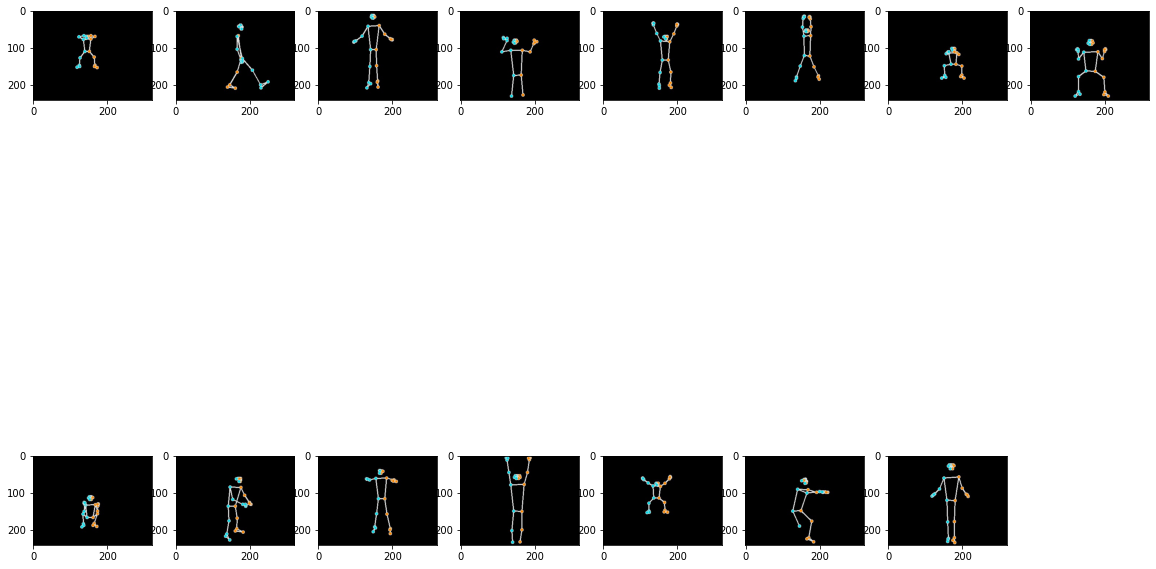

In [127]:
plt.figure(figsize=(20,15))
for i in range(15):
    plt.subplot(2,8,i+1);
    plt.imshow(X_train[i]);

# Load models

## model vgg

### import vgg

In [128]:
def load_model():
    # $CHALLENGIFY_BEGIN
    model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
    # $CHALLENGIFY_END
    
    return model

In [48]:
model = load_model()
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 240, 320, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 240, 320, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 240, 320, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 120, 160, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 120, 160, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 120, 160, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 60, 80, 128)       0     

In [129]:
# put the model in nontrainable
def set_nontrainable_layers(model):
    # Set the first layers to be untrainable
    model.trainable = False
    
    return model

model
model = set_nontrainable_layers(model)

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 10, 512)        14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 35840)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 500)               17920500  
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 3006      
Total params: 32,638,194
Trainable params: 0
Non-trainable params: 32,638,194
_________________________________________________________________


In [130]:
#adding some layers
def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainables, and add additional trainable layers on top'''

    base_model = set_nontrainable_layers(model)
    flatten_layer = layers.Flatten()
    dense_layer = layers.Dense(500, activation='relu')
    prediction_layer = layers.Dense(6, activation='softmax')
    
    
    model = models.Sequential([
        base_model,
        flatten_layer,
        dense_layer,
        prediction_layer
    ])

    return model

In [131]:
model = add_last_layers(model)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 6)                 32638194  
_________________________________________________________________
flatten_5 (Flatten)          (None, 6)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 500)               3500      
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 3006      
Total params: 32,644,700
Trainable params: 6,506
Non-trainable params: 32,638,194
_________________________________________________________________


### build and fit model_vgg

In [132]:
# build the model with the nontrainable layer + new layer trainable

def build_model():
  
    model = load_model()
    model = add_last_layers(model)
    
    opt = optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model


In [133]:
model = build_model()

In [134]:
# preprocess data for VGG
X_train = preprocess_input(X_train) 
X_val = preprocess_input(X_val)
X_test = preprocess_input(X_test)

In [136]:
%%time
# fit the model
es = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, restore_best_weights=True)

history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=50, 
                    batch_size=16, 
                    callbacks=[es])

Epoch 1/50
206/206 [==============================] - 123s 596ms/step - loss: 0.3349 - accuracy: 0.9575 - val_loss: 0.5835 - val_accuracy: 0.9454
Epoch 2/50
206/206 [==============================] - 122s 594ms/step - loss: 0.1994 - accuracy: 0.9666 - val_loss: 0.8649 - val_accuracy: 0.9029
Epoch 3/50
206/206 [==============================] - 123s 595ms/step - loss: 0.1193 - accuracy: 0.9791 - val_loss: 0.8263 - val_accuracy: 0.9345
Epoch 4/50
206/206 [==============================] - 123s 595ms/step - loss: 0.1240 - accuracy: 0.9781 - val_loss: 0.9923 - val_accuracy: 0.9138
Epoch 5/50
206/206 [==============================] - 122s 594ms/step - loss: 0.1656 - accuracy: 0.9766 - val_loss: 0.7894 - val_accuracy: 0.9417
Epoch 6/50
206/206 [==============================] - 124s 601ms/step - loss: 0.1341 - accuracy: 0.9848 - val_loss: 0.6469 - val_accuracy: 0.9417
Restoring model weights from the end of the best epoch.
Epoch 00006: early stopping
CPU times: user 1min 18s, sys: 4min 35s,

### Save model

In [80]:
from keras.models import load_model

model.save('my_model_vgg')


2021-09-02 18:03:14.203024: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: my_model_vgg/assets


### Results analyse vgg

In [56]:
# learning curves
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    #ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    #ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

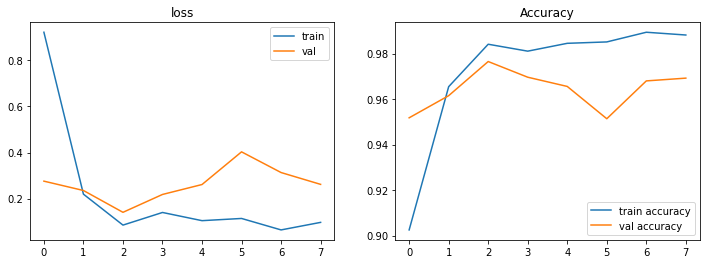

In [57]:
plot_history(history);

In [58]:
# evaluate
res_vgg = model.evaluate(X_test, y_test)

test_accuracy_vgg = res_vgg[-1]


print(f"test_accuracy_vgg = {round(test_accuracy_vgg,2)*100} %")

#print(f"test_accuracy = {round(test_accuracy,2)*100} %")

print(f'Chance level: {1./num_classes*100:.1f}%')

166/166 [==============================] - 160s 958ms/step - loss: 0.1466 - accuracy: 0.9767
test_accuracy_vgg = 98.0 %
Chance level: 16.7%


### predict with vgg

#### With one frame

In [105]:
!pwd

/Users/maximedupouy/code/BotMaximeDupouy/data-challenges


In [13]:
data_path_test = 'Desktop/test'

def load_test():
    labels = [1]
    
    home = expanduser('~')
    path = os.path.join(home, data_path_test, 'test_black43.jpg')
    image = Image.open(path)

    X = np.array(image)
    return X


In [122]:
classes = {0:'Push Up', 1:'Squat', 2:'Clean&Jerk', 3:'Jumping Jack', 4:'Lunge', 5:'Pull Up'}
prediction_array = model.predict(test)[0]
prediction = np.where(prediction_array == prediction_array.max())[0][0]
print(f'You are performing a {classes[prediction]}')

You are performing a Lunge


#### With multiple frames

In [98]:

def load_test_data_from_folder(folder_filepath):
    home = expanduser('~')
    video_sequence = []
    upper_range = len(os.listdir(os.path.join(home, folder_filepath)))
    step = int(upper_range/10)
    for index in range(0,upper_range,step):
        img = f'test_black{index}.jpg'
        path = os.path.join(os.path.join(home, folder_filepath), img)
        image = Image.open(path)
        #image = image.resize((32,24))
        video_sequence.append(np.array(image))
    video_sequence=video_sequence[0:10]
    video_sequence = np.array(video_sequence)
    return video_sequence

In [99]:
folder_filepath='Desktop/test'

test = load_test_data_from_folder(folder_filepath)
test.shape

(10, 240, 320, 3)

In [102]:
y_pred = model.predict(test)
y_pred = y_pred.sum(axis=0)
y_pred

array([1.8168428e-06, 2.7024192e-01, 3.4456714e-03, 2.9993868e+00,
       6.7269239e+00, 6.2465348e-09], dtype=float32)

## model resnet50

### import resnet50

In [15]:
from tensorflow.keras.applications import ResNet50

def load_model_resnet():
    # $CHALLENGIFY_BEGIN
    model_resnet = ResNet50(input_shape=X_train[0].shape, include_top=False, weights="imagenet")
    model_resnet.trainable = False
    # $CHALLENGIFY_END
    return model_resnet

#model_resnet.summary()

In [16]:
#adding some layers
def add_last_layers_resnet(model_resnet):
    '''Take a pre-trained model, set its parameters as non-trainables, and add additional trainable layers on top'''

    flatten_layer = layers.Flatten()
    dense_layer = layers.Dense(500, activation='relu')
    prediction_layer = layers.Dense(6, activation='softmax')
    
    model_resnet_final = models.Sequential([
        model_resnet,
        flatten_layer,
        dense_layer,
        prediction_layer
    ])

    return model_resnet_final

### build and fit model_resnet

In [19]:
def build_model_resnet():
  
    model_resnet = load_model_resnet()
    model_resnet_final = add_last_layers_resnet(model_resnet)
    
    opt = optimizers.Adam(learning_rate=0.01)
    model_resnet_final.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy', 'Precision'])
    return model_resnet_final

In [20]:
model_resnet_final = build_model_resnet()

In [21]:
%%time
# fit the model
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, verbose=1, restore_best_weights=True)

history = model_resnet_final.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=50, 
                    batch_size=16, 
                    callbacks=[es])

2021-09-03 09:24:29.861377: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2021-09-03 09:24:31.241389: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


420/420 [==============================] - ETA: 0s - loss: 47.6574 - accuracy: 0.5690 - precision: 0.8030

2021-09-03 09:28:02.946711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


420/420 [==============================] - 258s 609ms/step - loss: 47.6574 - accuracy: 0.5690 - precision: 0.8030 - val_loss: 1.0670 - val_accuracy: 0.6000 - val_precision: 0.9429
Epoch 2/50
420/420 [==============================] - 254s 605ms/step - loss: 1.1552 - accuracy: 0.6500 - precision: 0.9311 - val_loss: 3.1216 - val_accuracy: 0.6673 - val_precision: 0.8738
Epoch 3/50
420/420 [==============================] - 260s 620ms/step - loss: 1.6797 - accuracy: 0.5872 - precision: 0.9449 - val_loss: 1.2241 - val_accuracy: 0.5095 - val_precision: 0.9528
Epoch 4/50
420/420 [==============================] - 258s 615ms/step - loss: 1.4655 - accuracy: 0.4244 - precision: 0.9579 - val_loss: 1.5689 - val_accuracy: 0.3887 - val_precision: 0.9824
Epoch 5/50
420/420 [==============================] - 257s 613ms/step - loss: 1.4117 - accuracy: 0.3973 - precision: 0.9711 - val_loss: 1.2771 - val_accuracy: 0.3732 - val_precision: 0.9919
Epoch 6/50
420/420 [==============================] - 257s 6

###  Results analyse resnet

In [22]:
# learning curves
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    #ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    #ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

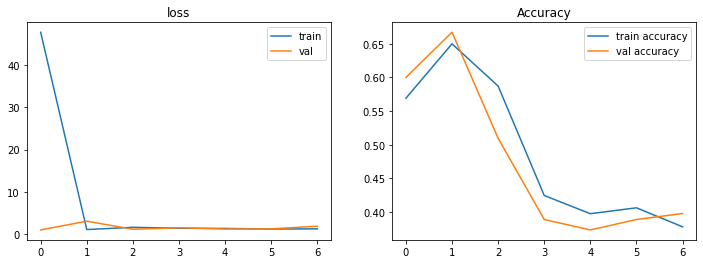

In [23]:
plot_history(history);

In [26]:
# evaluate
res_resnet = model_resnet_final.evaluate(X_test, y_test)

test_accuracy_resnet = res_resnet[1]


print(f"test_accuracy_resnet = {round(test_accuracy_resnet,2)*100} %")

#print(f"test_accuracy = {round(test_accuracy,2)*100} %")

print(f'Chance level: {1./num_classes*100:.1f}%')

113/113 [==============================] - 85s 744ms/step - loss: 3.7104 - accuracy: 0.6753 - precision: 0.8681
test_accuracy_resnet = 68.0 %
Chance level: 16.7%
